# Predicting Data Science Job Salaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data=pd.read_csv('F:\DATA SETS\ds_salaries.csv')
pd.set_option('display.max_columns',None)

In [3]:
data.head(20)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000.0,EUR,85847.0,ES,100,ES,NaN
1,2023,MI,NaN,ML Engineer,30000.0,USD,30000.0,US,100,US,S
2,2023,MI,CT,ML Engineer,25500.0,USD,NaN,US,100,US,S
3,2023,SE,FT,NaN,175000.0,USD,175000.0,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000.0,USD,120000.0,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200.0,USD,222200.0,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000.0,USD,136000.0,US,0,US,L
7,2023,SE,NaN,Data Scientist,219000.0,USD,219000.0,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000.0,USD,141000.0,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100.0,USD,147100.0,US,0,US,M


In [4]:
data.ndim

2

In [5]:
data.shape

(3755, 11)

In [6]:
data.isnull().sum()

work_year              0
experience_level       6
employment_type       15
job_title             16
salary                 7
salary_currency        0
salary_in_usd         12
employee_residence     0
remote_ratio           0
company_location       0
company_size          15
dtype: int64

In [7]:
data.dtypes

work_year               int64
experience_level       object
employment_type        object
job_title              object
salary                float64
salary_currency        object
salary_in_usd         float64
employee_residence     object
remote_ratio            int64
company_location       object
company_size           object
dtype: object

In [8]:
data.work_year=data.work_year.astype('object')
data.remote_ratio=data.remote_ratio.astype('object')

In [9]:
data.dtypes

work_year              object
experience_level       object
employment_type        object
job_title              object
salary                float64
salary_currency        object
salary_in_usd         float64
employee_residence     object
remote_ratio           object
company_location       object
company_size           object
dtype: object

In [10]:
data.remote_ratio.unique()

array([100, 0, 50], dtype=object)

In [11]:
data.employee_residence.unique()

array(['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'PT', 'NL', 'CH',
       'CF', 'FR', 'AU', 'FI', 'UA', 'IE', 'IL', 'GH', 'AT', 'CO', 'SG',
       'SE', 'SI', 'MX', 'UZ', 'BR', 'TH', 'HR', 'PL', 'KW', 'VN', 'CY',
       'AR', 'AM', 'BA', 'KE', 'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA',
       'LT', 'BE', 'AS', 'IR', 'HU', 'SK', 'CN', 'CZ', 'CR', 'TR', 'CL',
       'PR', 'DK', 'BO', 'PH', 'DO', 'EG', 'ID', 'AE', 'MY', 'JP', 'EE',
       'HN', 'TN', 'RU', 'DZ', 'IQ', 'BG', 'JE', 'RS', 'NZ', 'MD', 'LU',
       'MT'], dtype=object)

In [12]:
data.company_location.unique()

array(['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'NL', 'CH', 'CF',
       'FR', 'FI', 'UA', 'IE', 'IL', 'GH', 'CO', 'SG', 'AU', 'SE', 'SI',
       'MX', 'BR', 'PT', 'RU', 'TH', 'HR', 'VN', 'EE', 'AM', 'BA', 'KE',
       'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA', 'PL', 'AL', 'AR', 'LT',
       'AS', 'CR', 'IR', 'BS', 'HU', 'AT', 'SK', 'CZ', 'TR', 'PR', 'DK',
       'BO', 'PH', 'BE', 'ID', 'EG', 'AE', 'LU', 'MY', 'HN', 'JP', 'DZ',
       'IQ', 'CN', 'NZ', 'CL', 'MD', 'MT'], dtype=object)

In [13]:
data.job_title.unique()

array(['Principal Data Scientist', 'ML Engineer', nan, 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learni

In [14]:
data.employment_type.unique()

array(['FT', nan, 'CT', 'FL', 'PT'], dtype=object)

In [15]:
data.experience_level.unique()

array(['SE', 'MI', 'EN', 'EX', nan], dtype=object)

In [16]:
data.company_size.unique()

array([nan, 'S', 'M', 'L'], dtype=object)

In [17]:
data.company_size.value_counts()

M    3140
L     452
S     148
Name: company_size, dtype: int64

In [18]:
data.work_year.value_counts()

2023    1785
2022    1664
2021     230
2020      76
Name: work_year, dtype: int64

In [19]:
data.experience_level.value_counts()

SE    2510
MI     805
EN     320
EX     114
Name: experience_level, dtype: int64

In [20]:
data.job_title.value_counts()

Data Engineer                          1035
Data Scientist                          838
Data Analyst                            610
Machine Learning Engineer               287
Analytics Engineer                      101
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: job_title, Length: 93, dtype: int64

In [21]:
data.company_location.value_counts()

US    3040
GB     172
CA      87
ES      77
IN      58
      ... 
MK       1
BS       1
IR       1
CR       1
MT       1
Name: company_location, Length: 72, dtype: int64

In [22]:
data.employee_residence.value_counts()

US    3004
GB     167
CA      85
ES      80
IN      71
      ... 
BA       1
AM       1
CY       1
KW       1
MT       1
Name: employee_residence, Length: 78, dtype: int64

In [23]:
data.remote_ratio.value_counts()

0      1923
100    1643
50      189
Name: remote_ratio, dtype: int64

In [24]:
data.employment_type.value_counts()

FT    3704
PT      17
FL      10
CT       9
Name: employment_type, dtype: int64

In [25]:
data.describe(include=object)

,work_year,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size
count,3755,3749,3740,3739,3755,3755,3755,3755,3740
unique,4,4,4,93,20,78,3,72,3
top,2023,SE,FT,Data Engineer,USD,US,0,US,M
freq,1785,2510,3704,1035,3224,3004,1923,3040,3140


In [26]:
data.describe(include='float64') 

,salary,salary_in_usd
count,3.748000e+03,3743.000000
mean,1.907356e+05,137557.854662
std,6.723018e+05,63080.791725
min,6.000000e+03,5132.000000
25%,1.000000e+05,95000.000000
50%,1.375000e+05,135000.000000
75%,1.800000e+05,175000.000000
max,3.040000e+07,450000.000000


In [27]:
data=data.drop('salary_currency',axis=1)

In [28]:
data=data.drop('salary',axis=1)

In [29]:
data.rename(columns={'salary_in_usd':'salary'},inplace=True)

In [30]:
data.isnull().sum()

work_year              0
experience_level       6
employment_type       15
job_title             16
salary                12
employee_residence     0
remote_ratio           0
company_location       0
company_size          15
dtype: int64

In [31]:
data.salary=data.salary.fillna(data.salary.median())

In [32]:
data.isnull().sum()

work_year              0
experience_level       6
employment_type       15
job_title             16
salary                 0
employee_residence     0
remote_ratio           0
company_location       0
company_size          15
dtype: int64

In [33]:
from sklearn.impute import SimpleImputer
impute_mode=SimpleImputer(strategy='most_frequent')
impute_mode.fit(data[['experience_level','employment_type','job_title','company_size']])
data[['experience_level','employment_type','job_title','company_size']]=impute_mode.transform(data[['experience_level','employment_type','job_title','company_size']])
data.head(10)

,work_year,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847.0,ES,100,ES,M
1,2023,MI,FT,ML Engineer,30000.0,US,100,US,S
2,2023,MI,CT,ML Engineer,135000.0,US,100,US,S
3,2023,SE,FT,Data Engineer,175000.0,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000.0,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200.0,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000.0,US,0,US,L
7,2023,SE,FT,Data Scientist,219000.0,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000.0,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100.0,US,0,US,M


In [34]:
data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

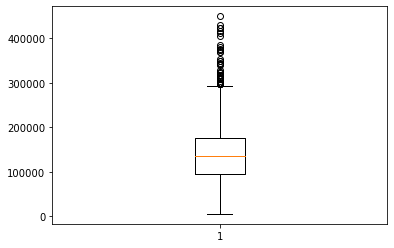

In [35]:
plt.boxplot(data.salary)
plt.show()

In [36]:
data=data[data.salary<=300000]
data

,work_year,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847.0,ES,100,ES,M
1,2023,MI,FT,ML Engineer,30000.0,US,100,US,S
2,2023,MI,CT,ML Engineer,135000.0,US,100,US,S
3,2023,SE,FT,Data Engineer,175000.0,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000.0,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...
3749,2021,SE,FT,Data Specialist,165000.0,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000.0,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000.0,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000.0,US,100,US,L


C:\Users\Ashutosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


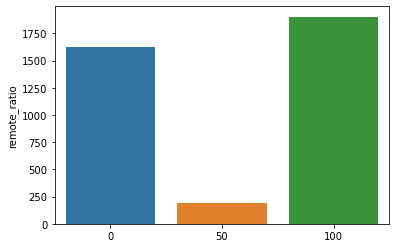

In [37]:
sns.barplot(data.remote_ratio.unique(),data.remote_ratio.value_counts())
plt.show()

C:\Users\Ashutosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


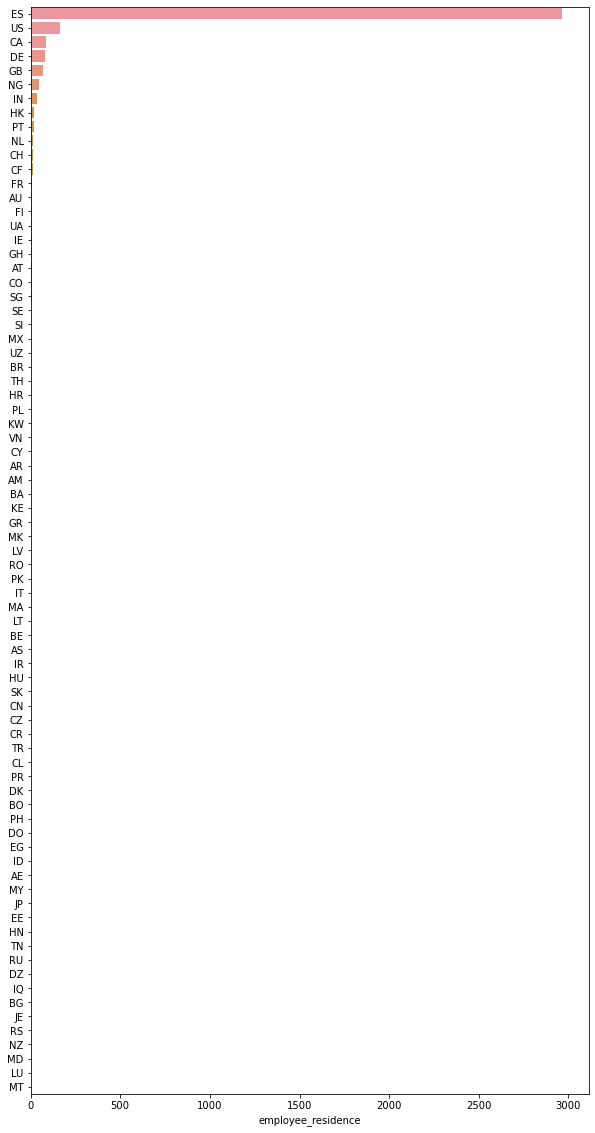

In [38]:
plt.figure(figsize=(10,20))
sns.barplot(data.employee_residence.value_counts(),data.employee_residence.unique())
plt.show()

C:\Users\Ashutosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


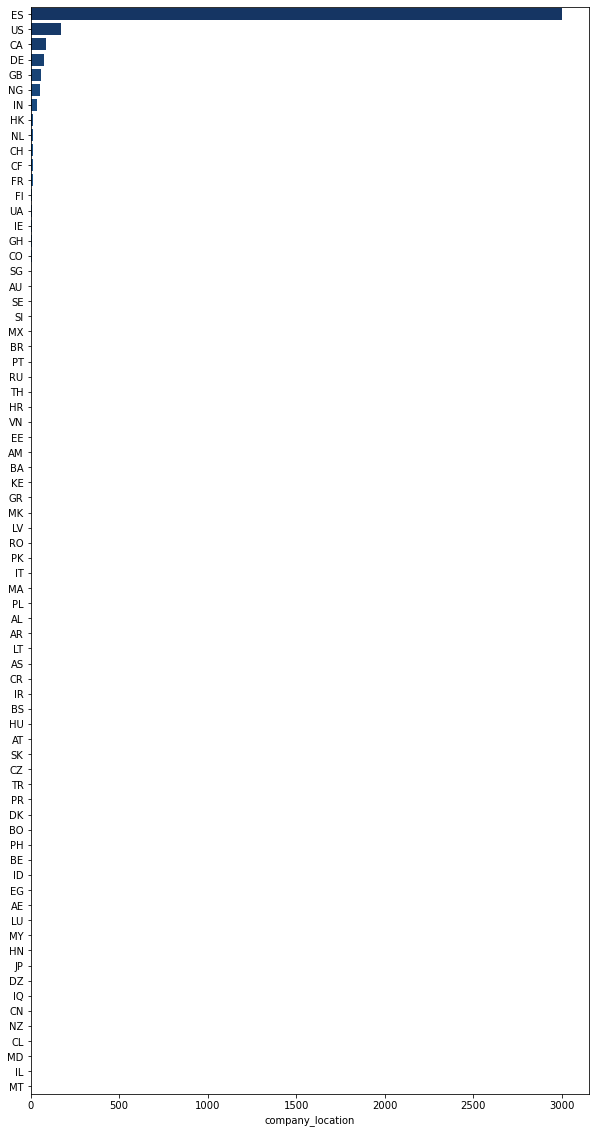

In [39]:
plt.figure(figsize=(10,20))
sns.barplot(data.company_location.value_counts(),data.company_location.unique(),palette='Blues_r')
plt.show()

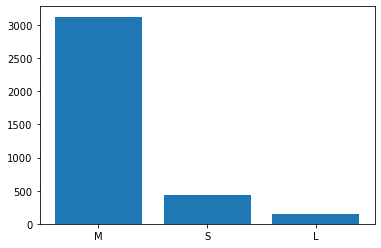

In [40]:
y= data.company_size.value_counts()
x= data.company_size.unique()
fig=plt.figure(figsize=(6,4))
plt.bar(x,y)
plt.show()

C:\Users\Ashutosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


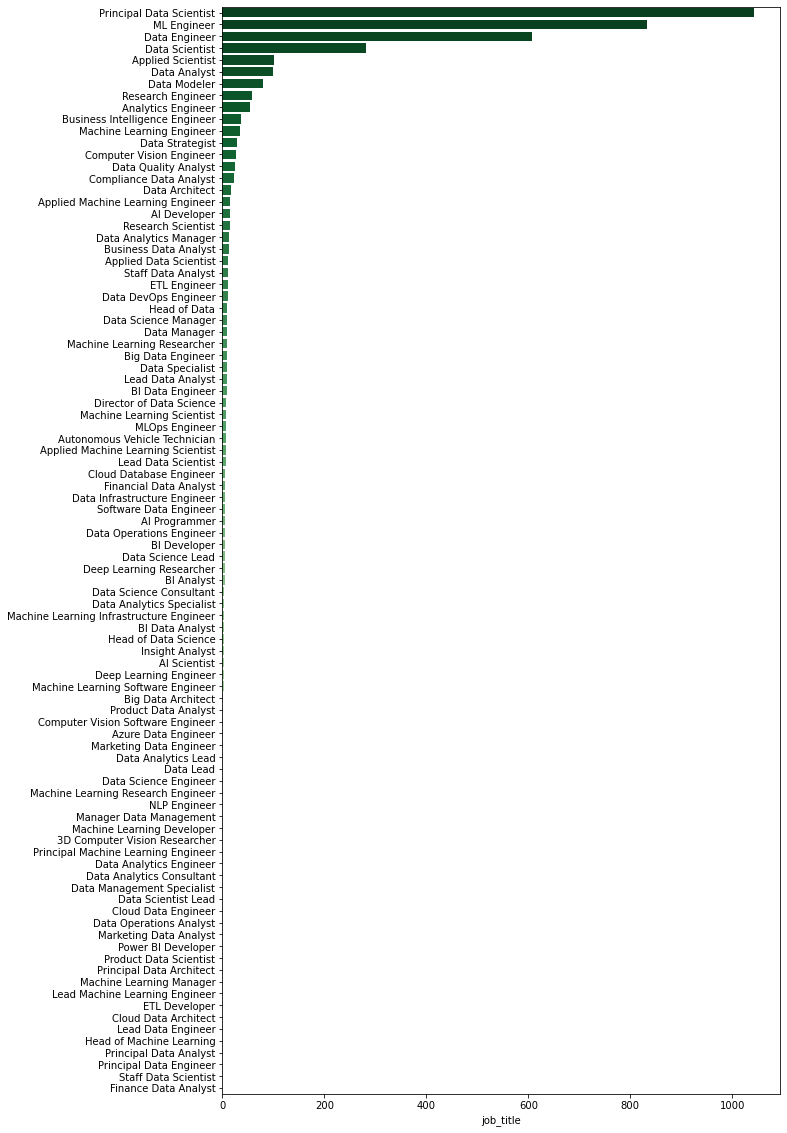

In [41]:
plt.figure(figsize=(10,20))
sns.barplot(data.job_title.value_counts(),data.job_title.unique(),palette='Greens_r')
plt.show()

C:\Users\Ashutosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


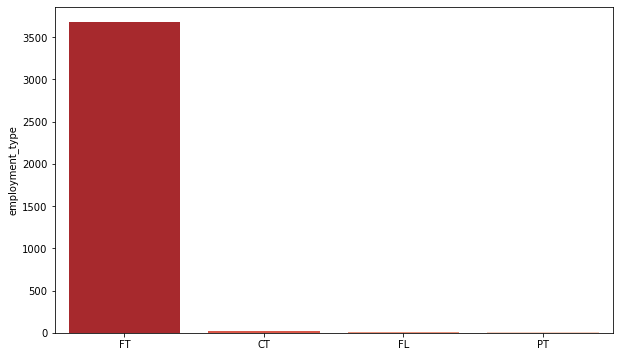

In [42]:
plt.figure(figsize=(10,6))
sns.barplot(data.employment_type.unique(),data.employment_type.value_counts(),palette='Reds_r')
plt.show()

C:\Users\Ashutosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


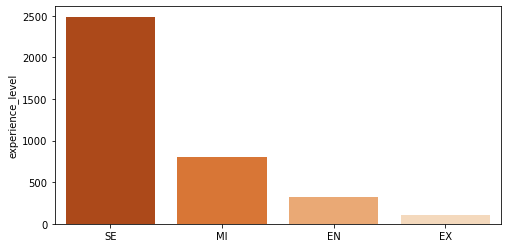

In [43]:
plt.figure(figsize=(8,4))
sns.barplot(data.experience_level.unique(),data.experience_level.value_counts(),palette='Oranges_r')
plt.show()

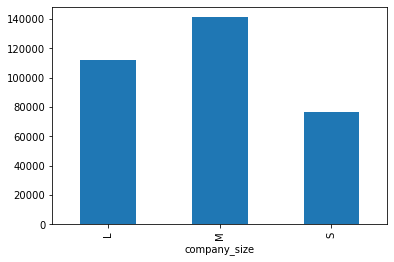

In [44]:
data.groupby('company_size')['salary'].mean().plot.bar()
plt.show()

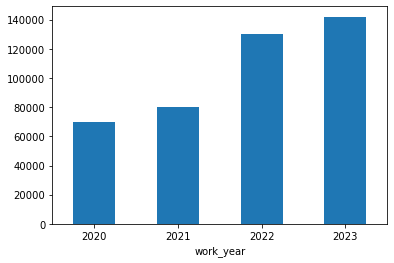

In [45]:
data.groupby('work_year')['salary'].median().plot.bar()
plt.xticks(rotation='horizontal')
plt.show()

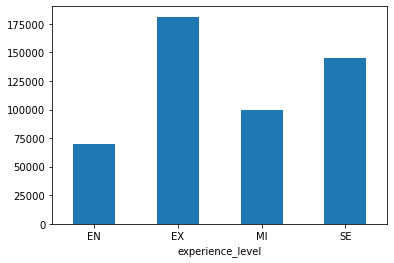

In [46]:
data.groupby('experience_level')['salary'].median().plot.bar()
plt.xticks(rotation='horizontal')
plt.show()

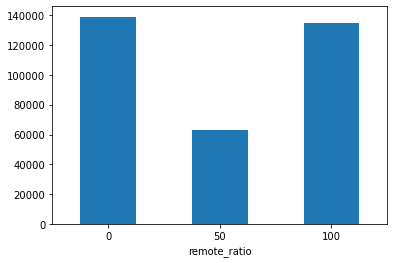

In [47]:
data.groupby('remote_ratio')['salary'].median().plot.bar()
plt.xticks(rotation='horizontal')
plt.show()

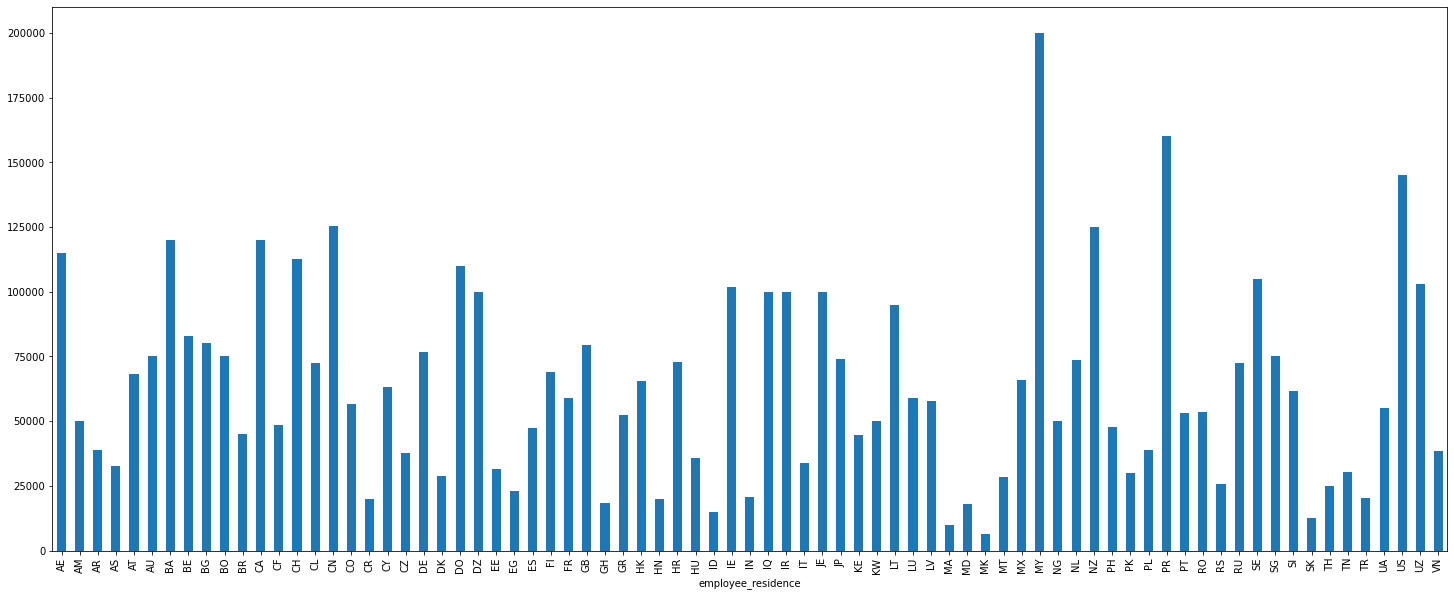

In [48]:
plt.figure(figsize=(25,10))
data.groupby('employee_residence')['salary'].median().plot.bar()
plt.show()

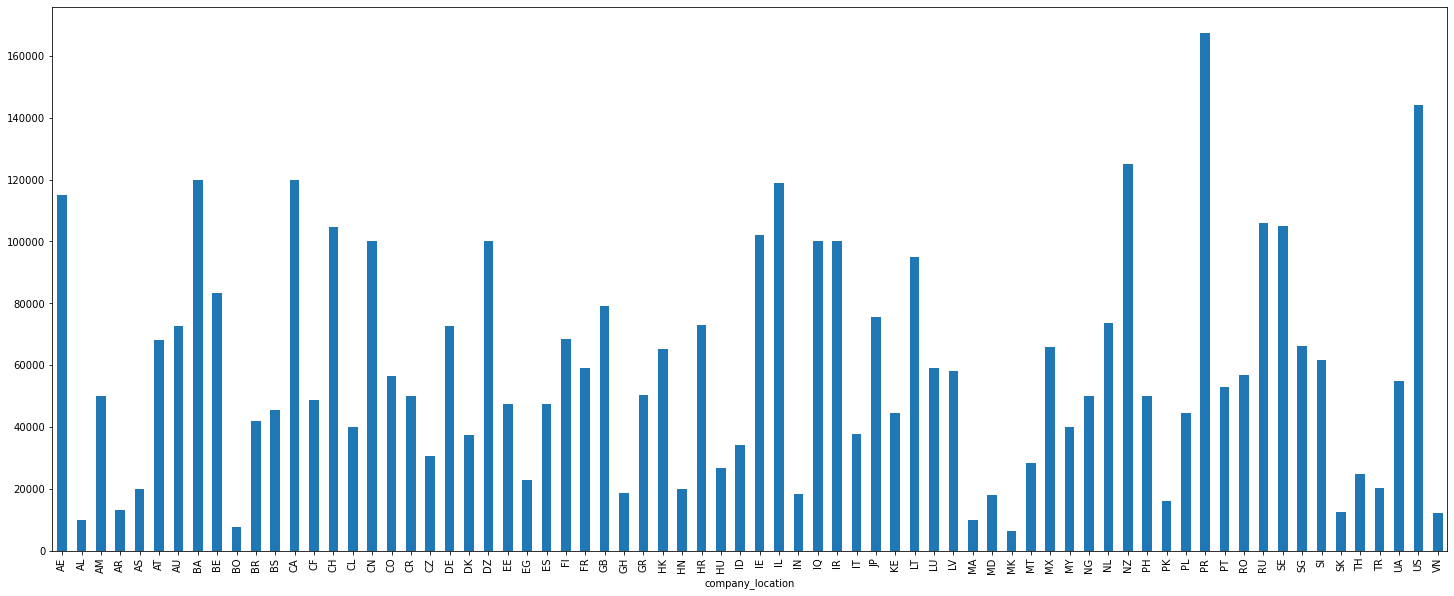

In [49]:
plt.figure(figsize=(25,10))
data.groupby('company_location')['salary'].median().plot.bar()
plt.show()

In [50]:
# pd.options.display.float_format = '{:,.0f}'.format
# data1=data.groupby('job_title').mean().sort_values('salary')
# data1
pd.options.display.float_format = '{:,.0f}'.format
salary_jobtitle = data.groupby(by='job_title').median().sort_values(by='salary', ascending=False)
salary_jobtitle.reset_index(inplace=True)
salary_jobtitle

,job_title,salary
0,Cloud Data Architect,"250,000"
1,Data Lead,"212,500"
2,Head of Data,"200,000"
3,Principal Data Engineer,"192,500"
4,Principal Machine Learning Engineer,"190,000"
...,...,...
87,Data Analytics Lead,"17,509"
88,Staff Data Analyst,"15,000"
89,3D Computer Vision Researcher,"15,000"
90,Product Data Scientist,"8,000"


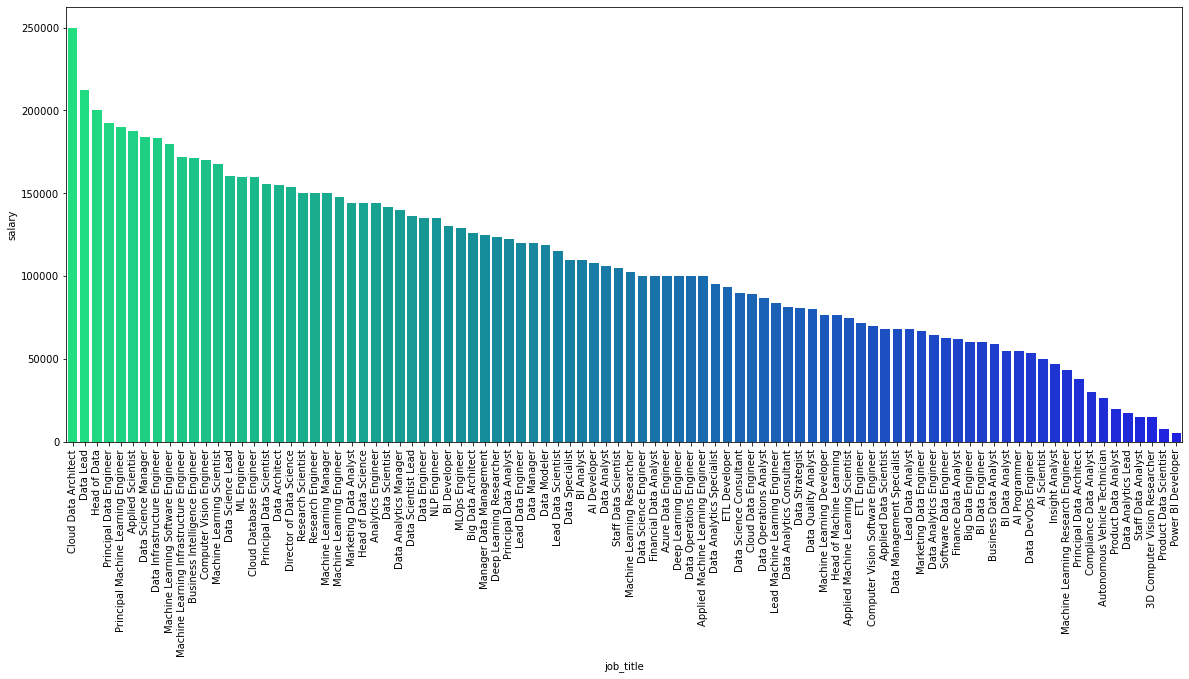

In [51]:
plt.figure(figsize=(20,8))
sns.barplot(data=salary_jobtitle, x = 'job_title', y = 'salary', palette = 'winter_r')
plt.xticks(rotation='vertical')
plt.show()

In [52]:
job_GB = data[data['company_location'] == 'GB']
job_GB = job_GB.groupby('job_title').median()['salary'].sort_values().reset_index()
job_GB.head()

,job_title,salary
0,Insight Analyst,"46,786"
1,Data Analytics Engineer,"50,000"
2,Data Analyst,"58,086"
3,Data Science Consultant,"60,951"
4,Lead Data Scientist,"61,566"


C:\Users\Ashutosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


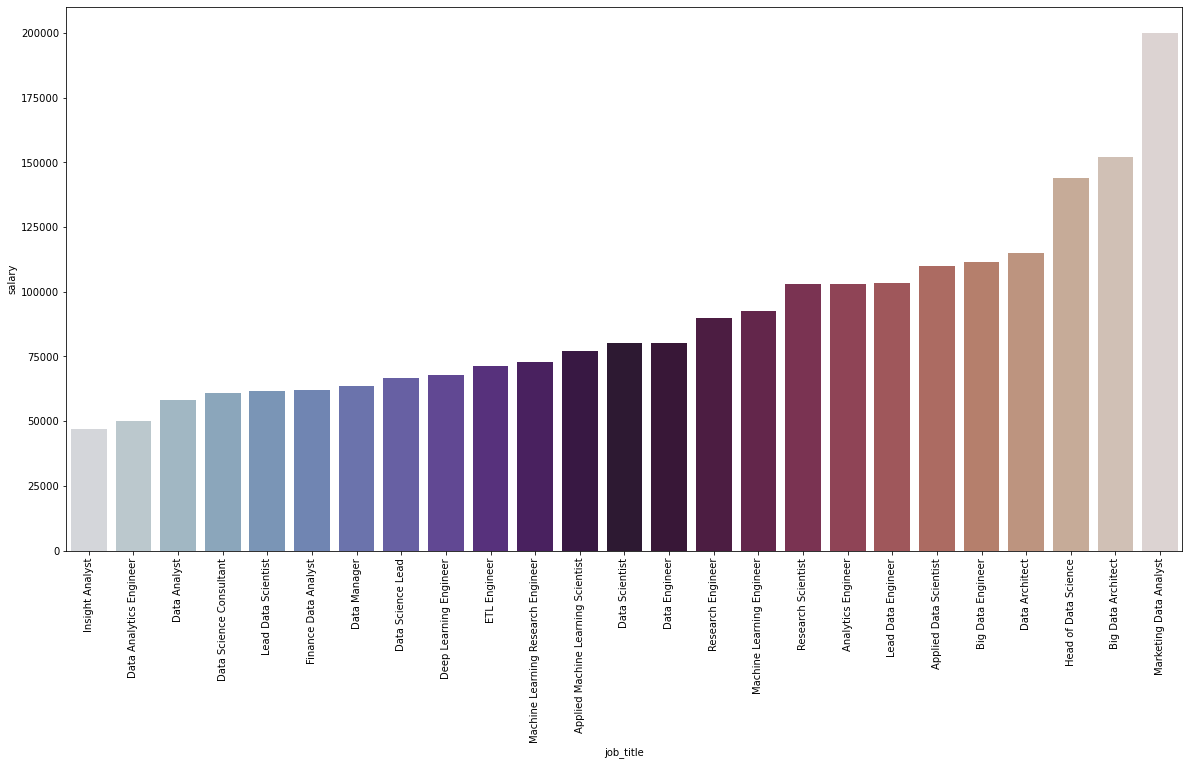

In [53]:
plt.figure(figsize=(20,10))
sns.barplot(job_GB.job_title,job_GB.salary,palette='twilight')
plt.xticks(rotation='vertical')
plt.show()

In [54]:
job_US = data[data['company_location'] == 'US']
job_US = job_US.groupby('job_title').median()['salary'].sort_values().reset_index()
job_US.head()

,job_title,salary
0,BI Data Engineer,"60,000"
1,Big Data Engineer,"70,000"
2,BI Data Analyst,"77,500"
3,Data Quality Analyst,"80,000"
4,Data Analytics Consultant,"81,500"


C:\Users\Ashutosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


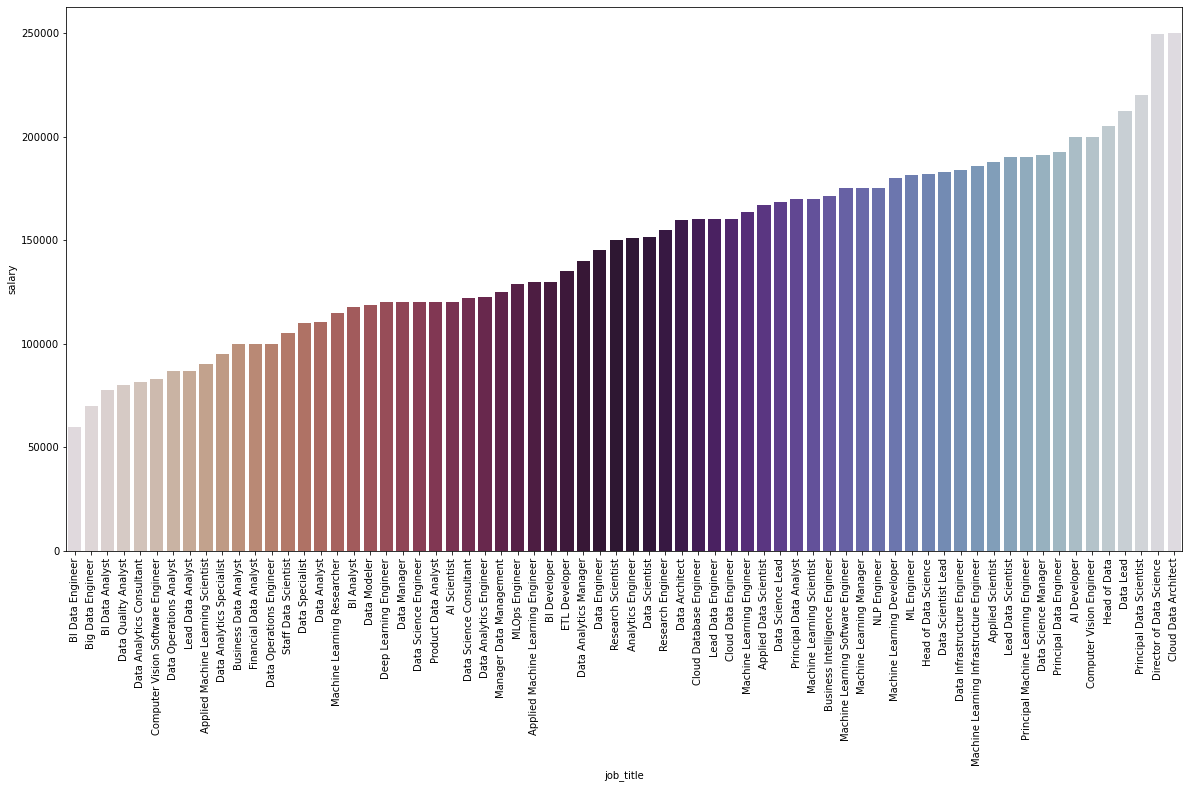

In [55]:
plt.figure(figsize=(20,10))
sns.barplot(job_US.job_title,job_US.salary,palette='twilight_r')
plt.xticks(rotation='vertical')
plt.show()

In [56]:
job_CA = data[data['company_location'] == 'CA']
job_CA = job_CA.groupby('job_title').median()['salary'].sort_values().reset_index()
job_CA.head()

,job_title,salary
0,Staff Data Analyst,"15,000"
1,Computer Vision Software Engineer,"53,654"
2,Applied Data Scientist,"54,238"
3,Business Data Analyst,"69,133"
4,Principal Data Analyst,"75,000"


C:\Users\Ashutosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


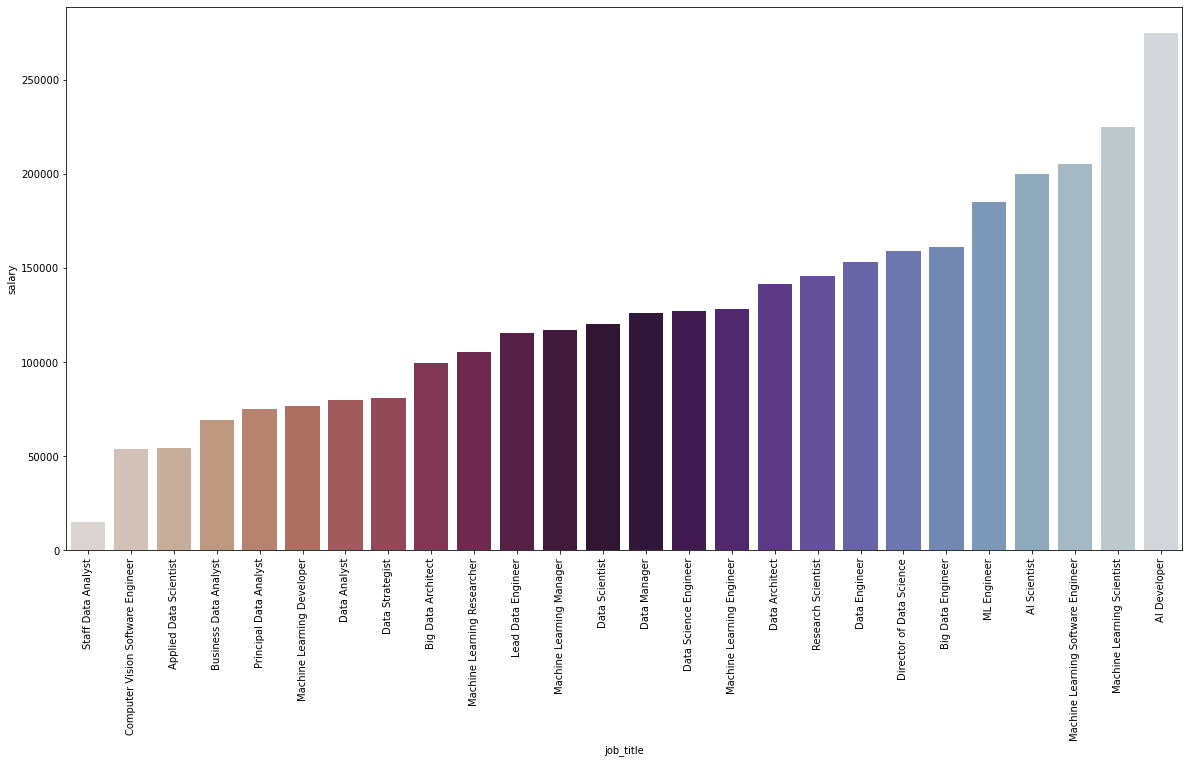

In [57]:
plt.figure(figsize=(20,10))
sns.barplot(job_CA.job_title,job_CA.salary,palette='twilight_r')
plt.xticks(rotation='vertical')
plt.show()

In [58]:
job_ES = data[data['company_location'] == 'ES']
job_ES = job_ES.groupby('job_title').median()['salary'].sort_values().reset_index()
job_ES.head()

,job_title,salary
0,Business Data Analyst,"21,461"
1,AI Scientist,"38,631"
2,Data Analyst,"42,026"
3,Data Scientist,"42,792"
4,Machine Learning Engineer,"47,282"


C:\Users\Ashutosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


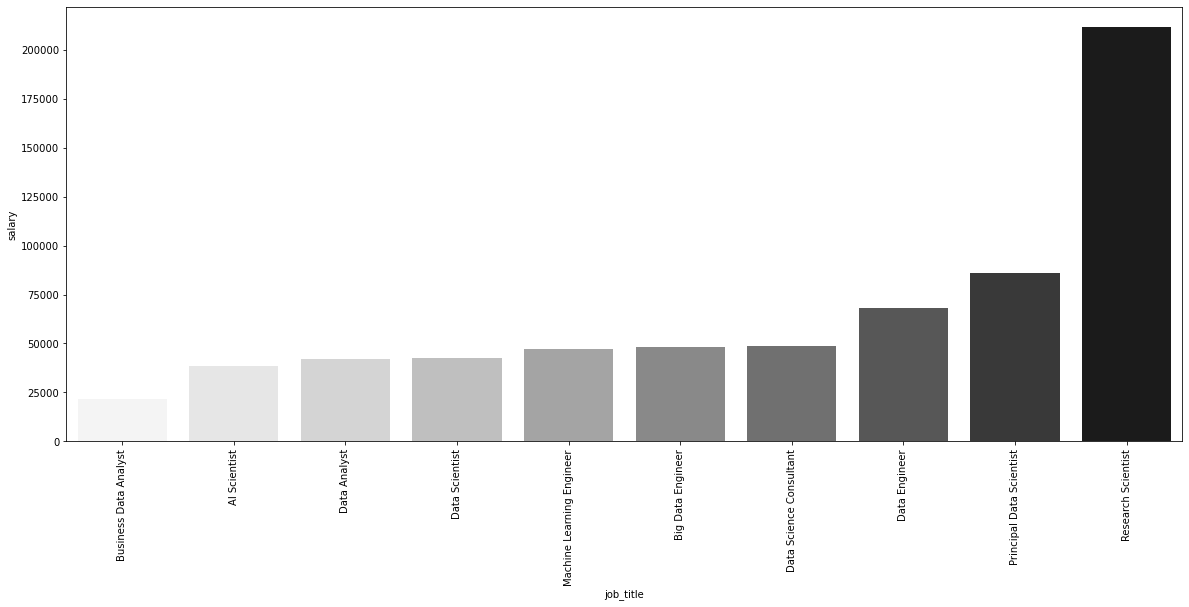

In [59]:
plt.figure(figsize=(20,8))
sns.barplot(job_ES.job_title,job_ES.salary,palette='Greys')
plt.xticks(rotation='vertical')
plt.show()

In [60]:
job_IN = data[data['company_location'] == 'IN']
job_IN = job_IN.groupby('job_title').median()['salary'].sort_values().reset_index()
job_IN.head()

,job_title,salary
0,3D Computer Vision Researcher,"5,409"
1,Power BI Developer,"5,409"
2,Data Science Consultant,"5,707"
3,BI Data Analyst,"8,050"
4,Product Data Analyst,"11,243"


C:\Users\Ashutosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


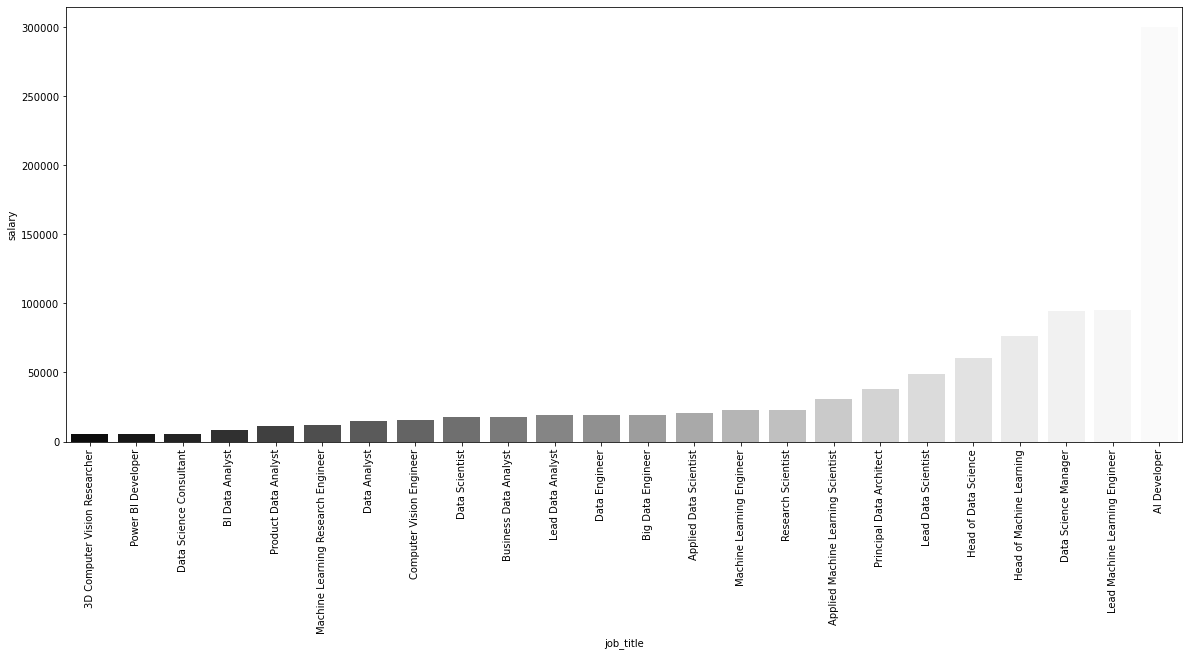

In [61]:
plt.figure(figsize=(20,8))
sns.barplot(job_IN.job_title,job_IN.salary,palette='Greys_r')
plt.xticks(rotation='vertical')
plt.show()

In [62]:
job_DE = data[data['company_location'] == 'DE']
job_DE = job_DE.groupby('job_title').median()['salary'].sort_values().reset_index()
job_DE.head()

,job_title,salary
0,ML Engineer,"15,966"
1,Machine Learning Developer,"33,000"
2,Machine Learning Scientist,"34,672"
3,Applied Machine Learning Scientist,"42,923"
4,Data Engineer,"55,475"


C:\Users\Ashutosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


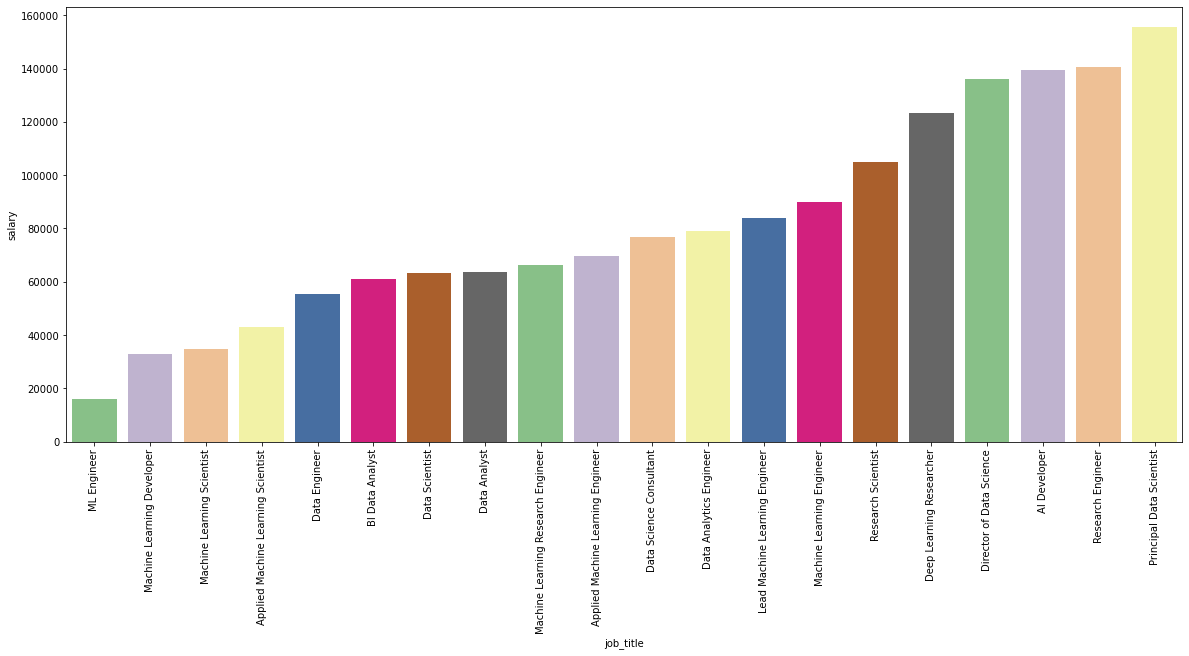

In [63]:
plt.figure(figsize=(20,8))
sns.barplot(job_DE.job_title,job_DE.salary,palette='Accent')
plt.xticks(rotation='vertical')
plt.show()

In [64]:
job_NG = data[data['company_location'] == 'NG']
job_NG = job_NG.groupby('job_title').median()['salary'].sort_values().reset_index()
job_NG.head()

,job_title,salary
0,Data Analyst,"10,000"
1,Compliance Data Analyst,"30,000"
2,Data Scientist,"50,000"
3,Data Quality Analyst,"100,000"
4,BI Analyst,"200,000"


C:\Users\Ashutosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


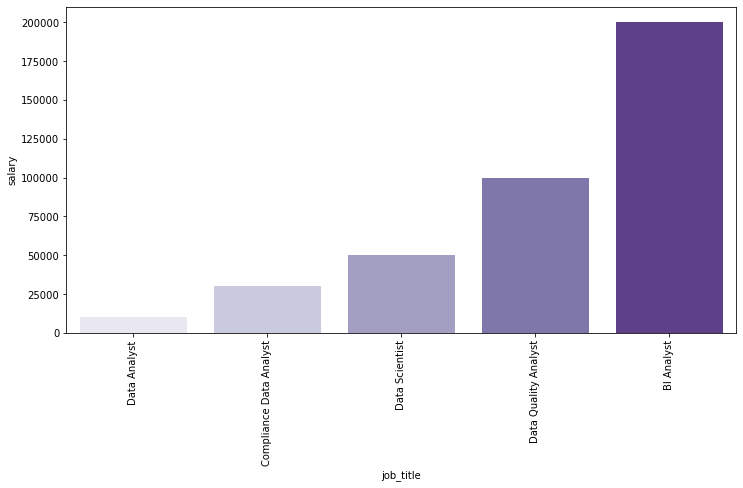

In [65]:
plt.figure(figsize=(12,6))
sns.barplot(job_NG.job_title,job_NG.salary,palette='Purples')
plt.xticks(rotation='vertical')
plt.show()

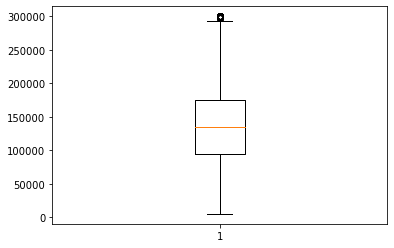

In [66]:
plt.boxplot(data.salary)
plt.show()

In [67]:
data=data[data.salary<=300000]
data

,work_year,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,"85,847",ES,100,ES,M
1,2023,MI,FT,ML Engineer,"30,000",US,100,US,S
2,2023,MI,CT,ML Engineer,"135,000",US,100,US,S
3,2023,SE,FT,Data Engineer,"175,000",CA,100,CA,M
4,2023,SE,FT,Data Scientist,"120,000",CA,100,CA,M
...,...,...,...,...,...,...,...,...,...
3749,2021,SE,FT,Data Specialist,"165,000",US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,"151,000",US,100,US,L
3752,2020,EN,FT,Data Scientist,"105,000",US,100,US,S
3753,2020,EN,CT,Business Data Analyst,"100,000",US,100,US,L


In [68]:
data=data.drop('employee_residence',axis=1)
data.tail(20)

,work_year,experience_level,employment_type,job_title,salary,remote_ratio,company_location,company_size
3733,2021,SE,FT,Principal Data Scientist,"235,000",100,US,L
3734,2021,MI,FT,Lead Data Analyst,"19,609",100,IN,L
3735,2021,EN,PT,AI Scientist,"12,000",100,US,S
3736,2021,MI,FT,Data Analyst,"75,000",0,US,L
3737,2021,MI,FT,Data Analyst,"62,000",0,US,L
3738,2021,MI,FT,Data Scientist,"73,000",0,US,L
3739,2021,MI,FT,Data Engineer,"45,391",100,NL,L
3740,2020,SE,FT,Data Science Manager,"190,200",100,US,M
3741,2020,MI,FT,Data Scientist,"118,000",100,US,M
3742,2020,MI,FT,Data Scientist,"138,350",100,US,M


In [69]:
data.shape

(3713, 8)

In [ ]:
plt.boxplot(data.salary)
plt.show()

In [70]:
z=['job_title','company_location']
z

['job_title', 'company_location']

In [71]:
for y in z:
    temp=data.groupby(y)['salary'].count()/len(data)
    temp_df=temp[temp>0.01].index
    data[y]=np.where(data[y].isin(temp_df),data[y],'other')

In [72]:
data

,work_year,experience_level,employment_type,job_title,salary,remote_ratio,company_location,company_size
0,2023,SE,FT,other,"85,847",100,ES,M
1,2023,MI,FT,other,"30,000",100,US,S
2,2023,MI,CT,other,"135,000",100,US,S
3,2023,SE,FT,Data Engineer,"175,000",100,CA,M
4,2023,SE,FT,Data Scientist,"120,000",100,CA,M
...,...,...,...,...,...,...,...,...
3749,2021,SE,FT,other,"165,000",100,US,L
3751,2021,MI,FT,other,"151,000",100,US,L
3752,2020,EN,FT,Data Scientist,"105,000",100,US,S
3753,2020,EN,CT,other,"100,000",100,US,L


In [73]:
# data1=data[data.company_location.isin(['US','GB','ES','IN','NG','CA','DE'])]
# data1.head()

In [74]:
# data1.salary.tail(10)

In [75]:
# data1.shape

In [76]:
# data_us=data[data.company_location=='US']
# data_us.head()

In [77]:
# data_gb=data[data.company_location=='GB']
# data_gb.head()

In [78]:
# data_ca=data[data.company_location=='CA']
# data_ca.head()

In [79]:
# data_in=data[data.company_location=='IN']
# data_in.head()

In [80]:
# data_es=data[data.company_location=='ES']
# data_es.head()

In [81]:
# data_ng=data[data.company_location=='NG']
# data_ng.head()

In [82]:
# data_de=data[data.company_location=='DE']
# data_de.head()

In [83]:
# dataset=pd.concat([data_us,data_gb,data_ca,data_in,data_es,data_ng,data_de],axis=0)
# dataset.head(10)

In [84]:
# dataset.columns

In [85]:
# dataset.shape

In [86]:
# dataset.isnull().sum()

In [87]:
# data.drop(['HK', 'NL', 'CH', 'CF','FR', 'FI', 'UA', 'IE', 'IL', 'GH', 'CO', 'SG', 'AU', 'SE', 'SI','MX', 'BR', 'PT', 'RU', 'TH', 'HR', 'VN', 'EE', 'AM', 'BA', 'KE','GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA', 'PL', 'AL', 'AR', 'LT','AS', 'CR', 'IR', 'BS', 'HU', 'AT', 'SK', 'CZ', 'TR', 'PR', 'DK','BO', 'PH', 'BE', 'ID', 'EG', 'AE', 'LU', 'MY', 'HN', 'JP', 'DZ','IQ', 'CN', 'NZ', 'CL', 'MD', 'MT'],inplace=True,axis=1)

In [88]:
# categorical_attributes=[i for i in data.columns if data[i].dtypes=='O']
# numerical_attributes=[i for i in data.columns if data[i].dtypes!='O']

In [89]:
# print(categorical_attributes)

In [90]:
# print(numerical_attributes)

In [91]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder(sparse=False)

In [92]:
columns_to_encode=['work_year','experience_level','employment_type','job_title','remote_ratio','company_location','company_size']
# encoded=enc.fit_transform(data.loc[:,columns_to_encode])
# data_encoded=pd.DataFrame(encoded,columns=enc.get_feature_names_out())
# combined_encoded_data=pd.concat([data,data_encoded],axis=1)
# encoded_data=combined_encoded_data.drop(labels=columns_to_encode,axis=1)

In [93]:
encoded=enc.fit_transform(data.loc[:,columns_to_encode])
encoded

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [94]:
data_encoded=pd.DataFrame(encoded,columns=enc.get_feature_names_out())
data_encoded

,work_year_2020,work_year_2021,work_year_2022,work_year_2023,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,job_title_Analytics Engineer,job_title_Applied Scientist,job_title_Data Analyst,job_title_Data Architect,job_title_Data Engineer,job_title_Data Science Manager,job_title_Data Scientist,job_title_Machine Learning Engineer,job_title_Research Scientist,job_title_other,remote_ratio_0,remote_ratio_50,remote_ratio_100,company_location_CA,company_location_DE,company_location_ES,company_location_GB,company_location_IN,company_location_US,company_location_other,company_size_L,company_size_M,company_size_S
0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1
2,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1
3,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3708,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0
3709,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0
3710,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
3711,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0


In [95]:
data_encoded.isnull().sum().sum()

0

In [96]:
data_encoded.shape

(3713, 35)

In [97]:
encoded_data=pd.concat([data.salary,data_encoded],axis=1)
encoded_data

,salary,work_year_2020,work_year_2021,work_year_2022,work_year_2023,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,job_title_Analytics Engineer,job_title_Applied Scientist,job_title_Data Analyst,job_title_Data Architect,job_title_Data Engineer,job_title_Data Science Manager,job_title_Data Scientist,job_title_Machine Learning Engineer,job_title_Research Scientist,job_title_other,remote_ratio_0,remote_ratio_50,remote_ratio_100,company_location_CA,company_location_DE,company_location_ES,company_location_GB,company_location_IN,company_location_US,company_location_other,company_size_L,company_size_M,company_size_S
0,"85,847",0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0
1,"30,000",0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1
2,"135,000",0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1
3,"175,000",0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0
4,"120,000",0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3463,NaN,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0
3468,NaN,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
3522,NaN,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0
3675,NaN,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0


In [98]:
encoded_data.isnull().sum()

salary                                 40
work_year_2020                         40
work_year_2021                         40
work_year_2022                         40
work_year_2023                         40
experience_level_EN                    40
experience_level_EX                    40
experience_level_MI                    40
experience_level_SE                    40
employment_type_CT                     40
employment_type_FL                     40
employment_type_FT                     40
employment_type_PT                     40
job_title_Analytics Engineer           40
job_title_Applied Scientist            40
job_title_Data Analyst                 40
job_title_Data Architect               40
job_title_Data Engineer                40
job_title_Data Science Manager         40
job_title_Data Scientist               40
job_title_Machine Learning Engineer    40
job_title_Research Scientist           40
job_title_other                        40
remote_ratio_0                    

In [99]:
encoded_data.shape

(3753, 36)

In [100]:
# combined_encoded_data=pd.concat([data,data_encoded],axis=1)
# combined_encoded_data

In [101]:
# encoded_data=combined_encoded_data.drop(labels=columns_to_encode,axis=1)

In [102]:
# encoded_data

In [103]:
x=encoded_data.drop('salary',axis=1)
y=encoded_data.salary

In [104]:
y=pd.DataFrame(y)

In [105]:
y.head()

,salary
0,"85,847"
1,"30,000"
2,"135,000"
3,"175,000"
4,"120,000"


In [106]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
feature_sel_model=SelectFromModel(Lasso(alpha=50,random_state=10))
feature_sel_model.fit(x,y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
feature_sel_model.get_support()

In [ ]:
selected_feat=x.columns[(feature_sel_model.get_support())]
print("number of features selected: {}".format(len(selected_feat)))

In [ ]:
selected_feat=list(selected_feat)
print(selected_feat)

In [ ]:
x=encoded_data[selected_feat]
x

In [ ]:
x.shape

In [ ]:
# from sklearn.feature_selection import SelectKBest,chi2
# chisquare_selector=SelectKBest(chi2,k=20)
# x_kbest=chisquare_selector.fit_transform(x,y)
# print(x_kbest)

In [ ]:
# x_kbest.shape

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

In [ ]:
x_train

In [ ]:
type(x_train)

In [ ]:
y_train=y_train.to_numpy()
y_train

In [ ]:
type(y_train)

In [ ]:
x_test

In [ ]:
y_test=y_test.to_numpy()
y_test

In [ ]:
type(y_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_x=StandardScaler()
scaler_y=StandardScaler()

In [ ]:
# y_train=pd.DataFrame(y_train,columns=['salary'])
# y_test=pd.DataFrame(y_test,columns=['salary'])
y_train=y_train.reshape((-1,1))
y_test=y_test.reshape((-1,1))
x_train=scaler_x.fit_transform(x_train)
y_train=scaler_y.fit_transform(y_train)
x_test=scaler_x.transform(x_test)
y_test=scaler_y.transform(y_test)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dropout,Dense
import tensorflow as tf
from tensorflow.keras import layers,models
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=25,activation='linear'))
model.add(tf.keras.layers.Dense(units=15,activation='linear'))
model.add(tf.keras.layers.Dense(10,activation='linear'))
model.add(tf.keras.layers.Dense(units=1,activation='linear'))

In [ ]:
# from sklearn.model_selection import GridSearchCV
# para_grid={'optimizer':['adam'],'batch_size':[10,20,30,40,50],'epochs':[40,70,100,150,200]}
# grid=GridSearchCV(model,para_grid,verbose=2,refit=True,cv=5,return_train_score=False,scoring='r2_Score')
# grid.fit(x,y)

In [ ]:
model.compile(optimizer='Adam',loss='mean_squared_error',metrics=['mean_squared_error'])

In [ ]:
model1=model.fit(x_train,y_train,validation_split=0.25,batch_size=30,epochs=100)

In [ ]:
from xgboost import XGBRegressor
gbr=XGBRegressor(max_depth=2,n_estimators=1000,learning_rate=0.01)
gbr.fit(x_train,y_train)

In [ ]:
y_pred2=gbr.predict(x_test)
y_pred2

In [ ]:
model.evaluate(x_train,y_train)

In [ ]:
model.evaluate(x_test,y_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test,y_pred2)

In [ ]:
def plot_history(model1, key):
  plt.plot(model1.history[key])
  plt.plot(model1.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()

In [ ]:
plot_history(model1, 'mean_squared_error')

In [ ]:
y_pred=model.predict(x_test)
y_pred

In [ ]:
r2_score(y_test,y_pred)

In [ ]:
df=pd.DataFrame({'y_test':y_test.ravel(),'y_pred':y_pred.ravel()})
df

###### 

In [ ]:
mse,mae=model.evaluate(x_test,y_test)
mse

In [ ]:
mae